# **Clasificación espectral II**

## Resumen

La forma más sencilla de comenzar a estudiar un conjunto de objetos es clasificarlos en función de características comunes, es decir, elaborar su taxonomía. La forma de clasificar a las estrellas se basa en las características de sus espectros, por lo que la llamamos "clasificación espectral". La clasificación espectral divide las estrellas en tipos espectrales y, con un refinamiento posterior, en clases de luminosidad. No obstante, en muchas ocasiones hablamos de tipo espectral para referirnos a la combinación de ambos, el tipo espectral y la clase de luminosidad.

En esta práctica vamos a clasificar una serie de espectros estelares digitales comparando con los estándares provistos en el “Spectral Classification Atlas” de R.O. Gray (http://ned.ipac.caltech.edu/level5/Gray/frames.html).



In [1]:
# Abrimos todos los espectros en le directorio
from specutils import Spectrum1D
import os
#
spec1 = Spectrum1D.read("espectro01.fits")
spec2 = Spectrum1D.read("espectro02.fits")
spec3 = Spectrum1D.read("espectro03.fits")
spec4 = Spectrum1D.read("espectro04.fits")
spec5 = Spectrum1D.read("espectro05.fits")
spec6 = Spectrum1D.read("espectro06.fits")
spec7 = Spectrum1D.read("espectro07.fits")
spec8 = Spectrum1D.read("espectro08.fits")
spec9 = Spectrum1D.read("espectro09.fits")
spec10 = Spectrum1D.read("espectro10.fits")

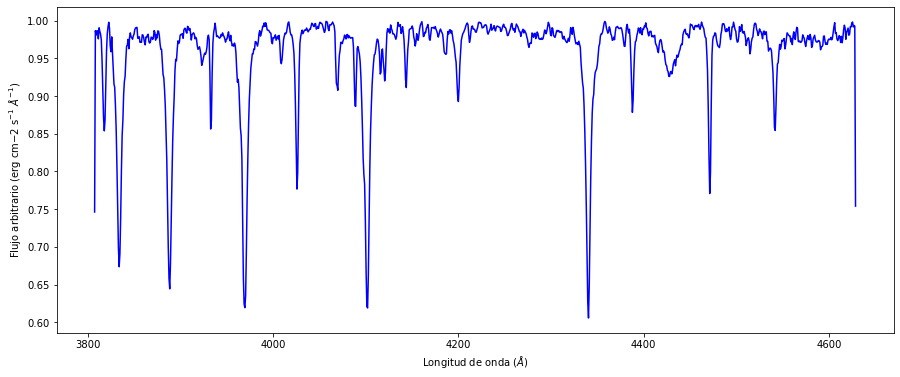

In [2]:
# Ploteo el espectro que quiero
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
#
# Elijo qué espectro quiero graficar
espectro = spec5
#
plt.plot(espectro.spectral_axis, espectro.flux, c='blue')
#
plt.xlabel('Longitud de onda ($\AA$)')
plt.ylabel('Flujo arbitrario (erg cm${-2}$ s$^{-1}$ $\AA^{-1}$)')
plt.show()


#### Ejercicio 1.

¿Puede identificar líneas que estén presentes en los 10 espectros?

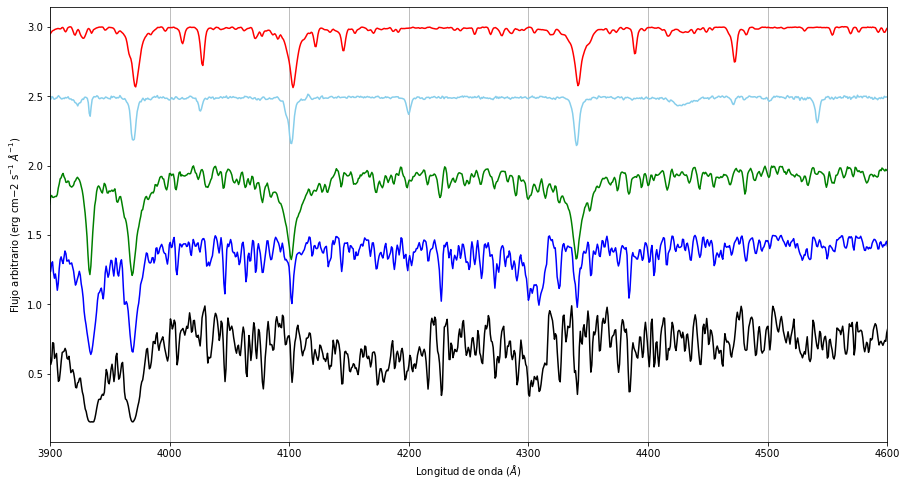

In [3]:
# Ploteo todas las que quiero teniendo cuidado en desplazarlos algo en "flujo"
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
#
plt.xlabel('Longitud de onda ($\AA$)')
plt.ylabel('Flujo arbitrario (erg cm${-2}$ s$^{-1}$ $\AA^{-1}$)')
plt.plot(spec1.spectral_axis, spec1.flux, c='black')
plt.plot(spec2.spectral_axis, spec2.flux+0.5, c='blue')
plt.plot(spec4.spectral_axis, spec4.flux+1.0, c='green')
plt.plot(spec6.spectral_axis, spec6.flux+1.5, c='skyblue')
plt.plot(spec10.spectral_axis, spec10.flux+2.0, c='red')
#
# Algunos modificadores de interés: 
#
plt.grid(axis='x')
plt.xlim(3900, 4600)
plt.show()

#### Ejercicio 2.

Elija 3 espectros parecidos entre sí y clasifíquelos.

Busque los espectros de las estrellas enanas en el Atlas mencionado. Identifique las líneas sugeridas como criterios de clasificación. Realice un informe de todo lo realizado.

Para poder identificar las líneas de interés, utilice la siguiente forma de graficar espectros en forma interactiva.

In [4]:
# ploteo un espectro pero de una forma que me permite interactuar, i.e. zoomear y desplazar en x e y
import altair as alt
import pandas as pd
import numpy as np
#
# Elijo el espectro que quiero graficar
data = spec10
#
data1 = pd.DataFrame(data.flux, data.spectral_axis)
data1.columns = ['FLUX']
data2 = pd.DataFrame(data.spectral_axis, data.spectral_axis)
data2.columns = ['WAVE']
data = pd.concat([data2, data1], axis=1)
chart = alt.Chart(data)
alt.Chart(data).mark_line().encode(
    x='WAVE',
    y='FLUX',
).properties(
    width=900,
    height=400
).interactive()

alt.Chart(...)

In [5]:
# Ploteo interactivamente y agrego una "regla" vertical para saber la long. de onda de la línea que me interesa
#
import altair as alt
import pandas as pd
import numpy as np

dato = spec7
data1 = pd.DataFrame(dato.flux, dato.spectral_axis)
data2 = pd.DataFrame(dato.spectral_axis, dato.spectral_axis)
data = pd.concat([data2, data1], axis=1)
source = data
data.columns = ['x', 'y']

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# Plot del espectro
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
)

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'x:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)
# Put the chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=900, height=400
).interactive()

alt.LayerChart(...)